# R2 

In [1]:
# import libraries 
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dypac_utils import get_root_data
from cneuromod_embeddings.r2_summary import fetch_r2, _r2_intra, _r2_inter, _r2_other

# Set the Seaborn parameters
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Set up file names... where to find the data.
path_data = get_root_data('results/friends-s02')

fwhm = 5
xp_type = 'friends-s02'

In [2]:
path_results = os.path.join(path_data, 'r2_cerebellum')
r2 = {}
r2['cortex'] = fetch_r2(os.path.join(path_data, 'r2_cortex'), xp_type)
r2['central'] = fetch_r2(os.path.join(path_data, 'r2_central'), xp_type)
r2['cerebellum'] = fetch_r2(os.path.join(path_data, 'r2_cerebellum'), xp_type)

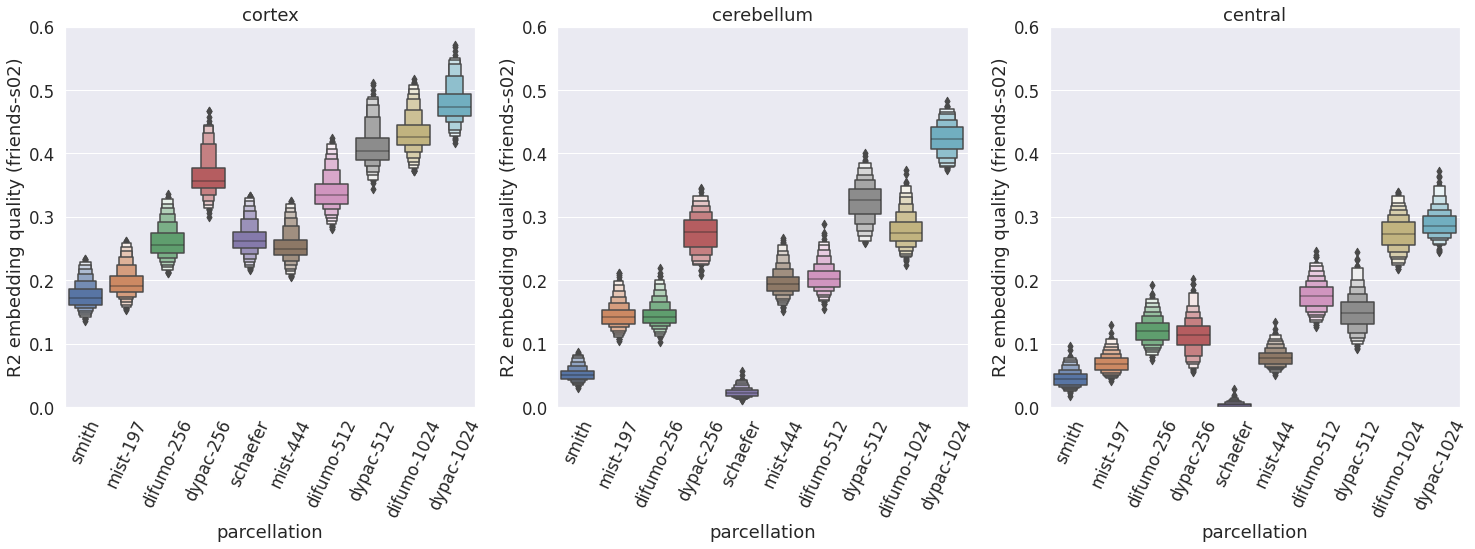

In [3]:
def plot_r2_parcels(r2, type_mask):
    labels = ('smith', 'mist-197', 'difumo-256', 'dypac-256', 'schaefer', 'mist-444', 'difumo-512', 'dypac-512', 'difumo-1024', 'dypac-1024')
    val_r2 = pd.read_pickle(r2[type_mask]['other']['smith'])
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['mist197']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['difumo256']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['intra']['cluster-64_state-256']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['schaefer']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['mist444']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['difumo512']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['intra']['cluster-64_state-512']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['other']['difumo1024']))
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['intra']['cluster-256_state-1024']))
    sns.boxenplot(data=val_r2, x='params', y='r2', scale='area')
    plt.ylim( (0, 0.6))
    plt.xticks(range(10), labels, rotation=65)
    plt.ylabel('R2 embedding quality (friends-s02)')
    plt.xlabel('parcellation')
    plt.title(type_mask)

fig = plt.figure(figsize=(25, 7))
plt.subplot(1, 3, 1)
plot_r2_parcels(r2, 'cortex')

plt.subplot(1, 3, 2)
plot_r2_parcels(r2, 'cerebellum')

plt.subplot(1, 3, 3)
plot_r2_parcels(r2, 'central')

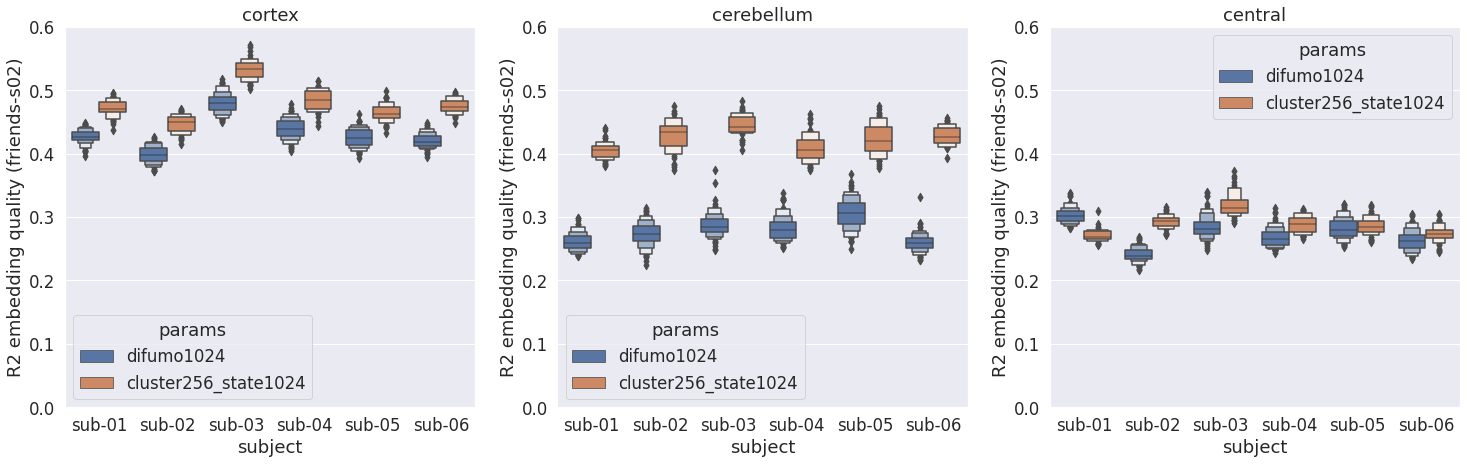

In [4]:
fig = plt.figure(figsize=(25, 7))

def plot_r2_subject(r2, type_mask):
    val_r2 = pd.read_pickle(r2[type_mask]['other']['difumo1024'])
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['intra']['cluster-256_state-1024']))
    sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
    plt.ylim( (0, 0.6))
    plt.ylabel('R2 embedding quality (friends-s02)')
    plt.title(type_mask)

plt.subplot(1, 3, 1)
plot_r2_subject(r2, 'cortex')

plt.subplot(1, 3, 2)
plot_r2_subject(r2, 'cerebellum')

plt.subplot(1, 3, 3)
plot_r2_subject(r2, 'central')

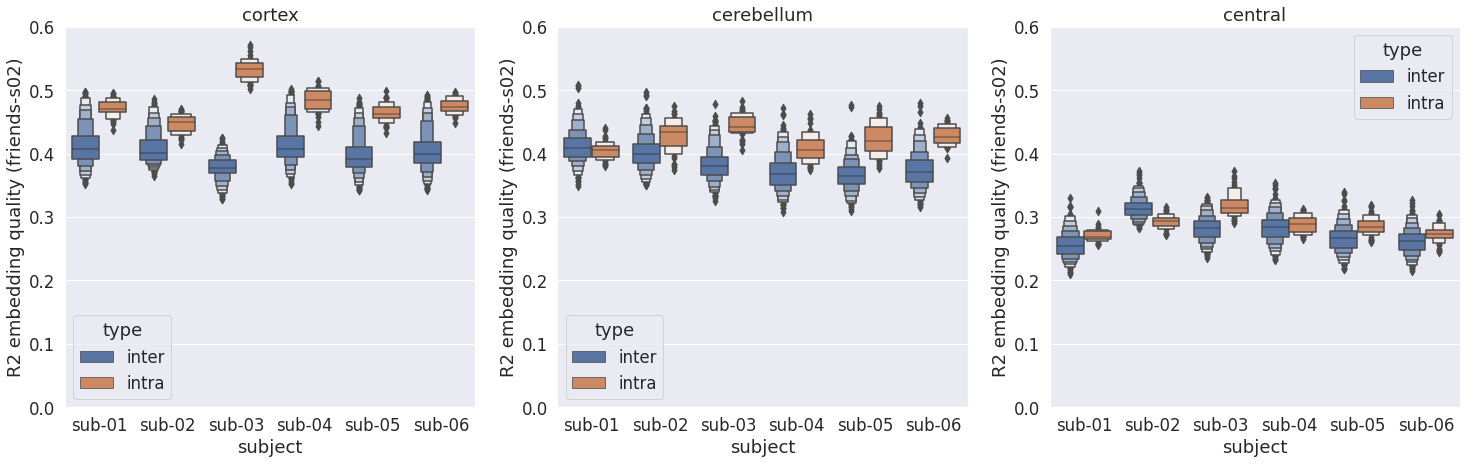

In [5]:
fig = plt.figure(figsize=(25, 7))

def plot_r2_intra_vs_inter(r2, type_mask):
    val_r2 = pd.read_pickle(r2[type_mask]['inter']['cluster-256_state-1024'])
    val_r2 = val_r2.append(pd.read_pickle(r2[type_mask]['intra']['cluster-256_state-1024']))
    sns.boxenplot(data=val_r2, x='subject', y='r2', hue='type', scale='area')
    plt.ylim( (0, 0.6))
    plt.ylabel('R2 embedding quality (friends-s02)')
    plt.title(type_mask)

plt.subplot(1, 3, 1)
plot_r2_intra_vs_inter(r2, 'cortex')
plt.subplot(1, 3, 2)
plot_r2_intra_vs_inter(r2, 'cerebellum')
plt.subplot(1, 3, 3)
plot_r2_intra_vs_inter(r2, 'central')

# Matching `n_state=1024`

In [1]:
import os
import numpy as np
from cneuromod_embeddings.dypac_utils import get_root_data, load_dypac
from cneuromod_embeddings.repro_summary import load_repro, visu_match
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

root_data = get_root_data('data/friends-s02')
root_results = get_root_data('results/friends-s02')
fwhm = 5
cluster = 256
state = 1024
xp_type = 'friends-s02'
R = load_repro(root_data=root_results, fwhm=fwhm, cluster=cluster, state=state)

In [2]:
subject = 'sub-01'
Rintra = R[subject][subject]
match_val = np.max(Rintra, axis=0)
match_pair = np.argmax(Rintra, axis=0)
order = np.argsort(-match_val)
model1, mask_img1 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="training", xp_type=xp_type)
model2, mask_img2 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="test", xp_type=xp_type)

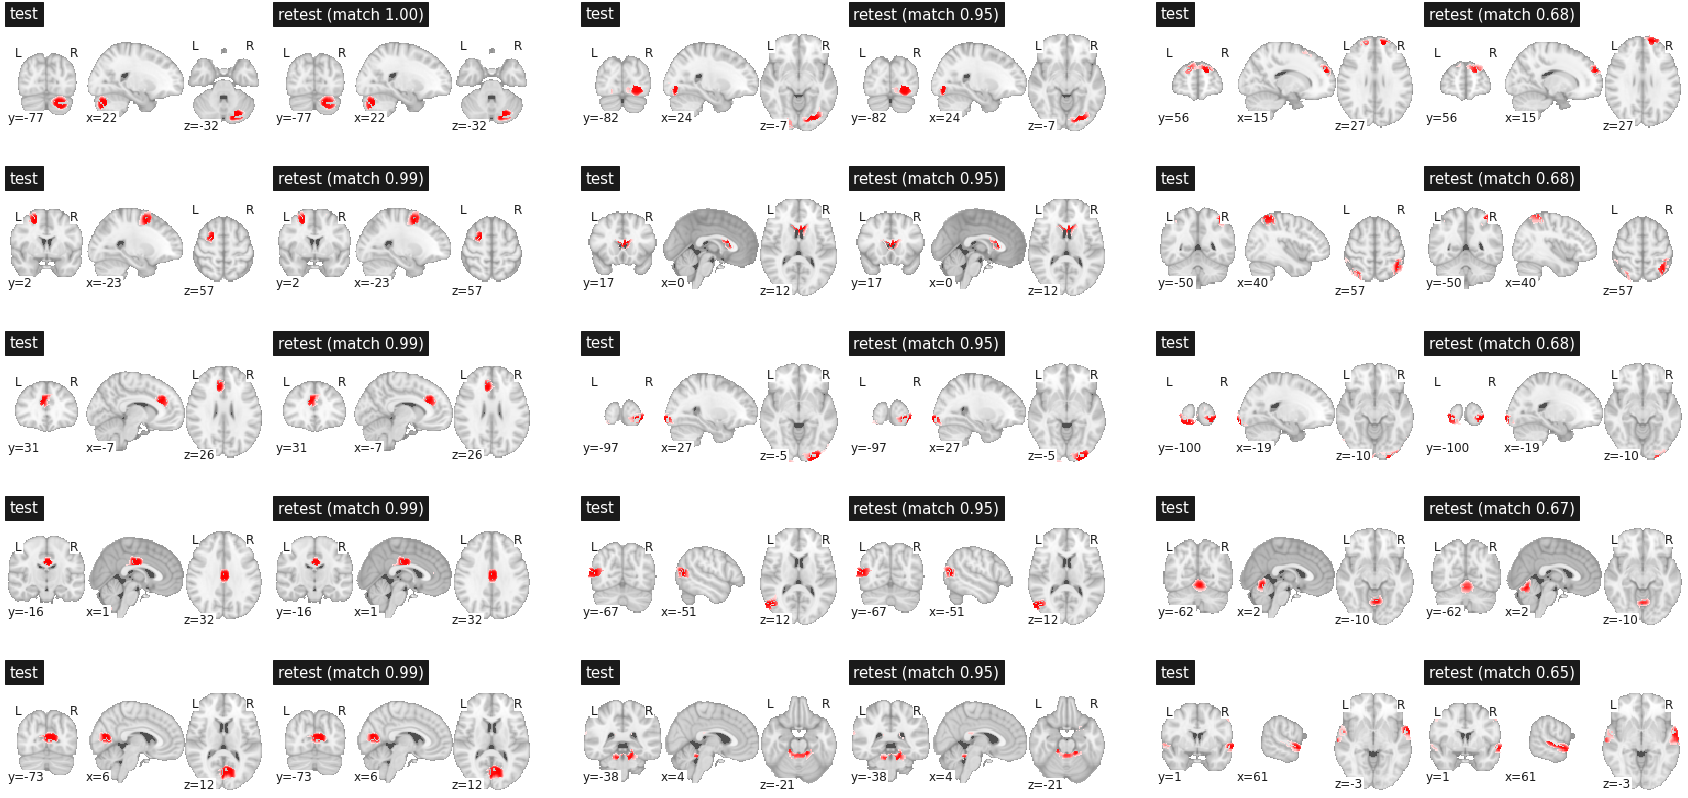

In [12]:
n_comp = 5
list_start = (0, 512, 1000)
n_plot = len(list_start)
fig = plt.figure(figsize=(30, 15))
outer = gridspec.GridSpec(1, n_plot, wspace=0.1, hspace=0.2)
for i in range(n_plot):
    inner = gridspec.GridSpecFromSubplotSpec(n_comp, 2,
                    subplot_spec=outer[i], wspace=0.05, hspace=0.05)
    visu_match(list_start[i], n_comp, model1, model2, order, match_pair, match_val, inner=inner, fig=fig)

# Reproducibility

In [1]:
import os
from cneuromod_embeddings import dypac_utils
from cneuromod_embeddings.repro_summary import repro_df, visu_repro
import seaborn as sns
import matplotlib.pyplot as plt

root_path, basename = os.path.split(dypac_utils.__file__)
xp_type = "friends-s02"
root_data = os.path.join(root_path, 'results', xp_type)
val_repro = repro_df(root_data, xp_type=xp_type)
params = dypac_utils.dypac_params(xp_type)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
data = val_repro[val_repro['fwhm']==fwhm]

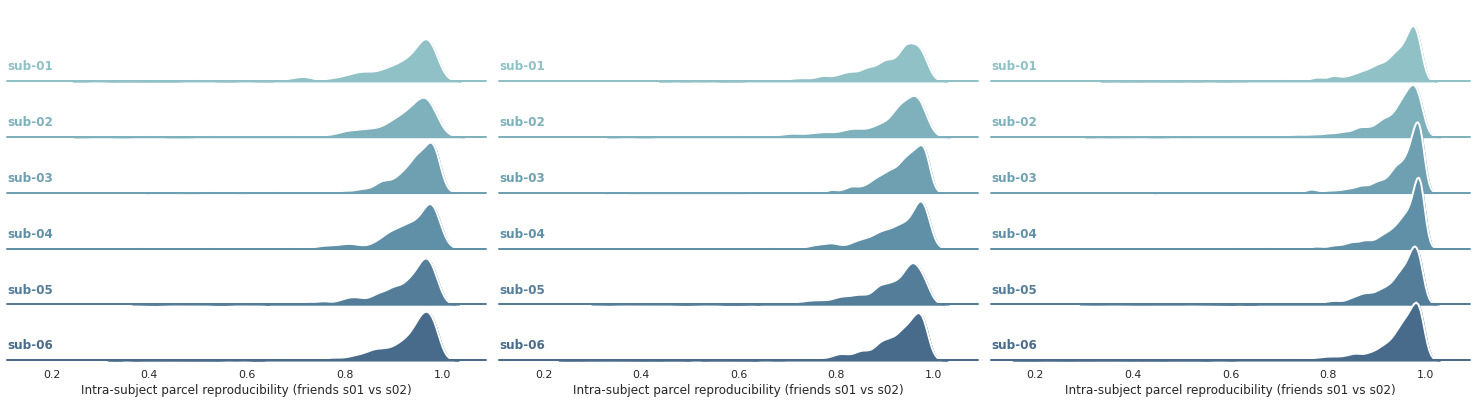

In [4]:
visu_repro(data, 
           title='Intra-subject parcel reproducibility (friends s01 vs s02)', type_comp='intra')

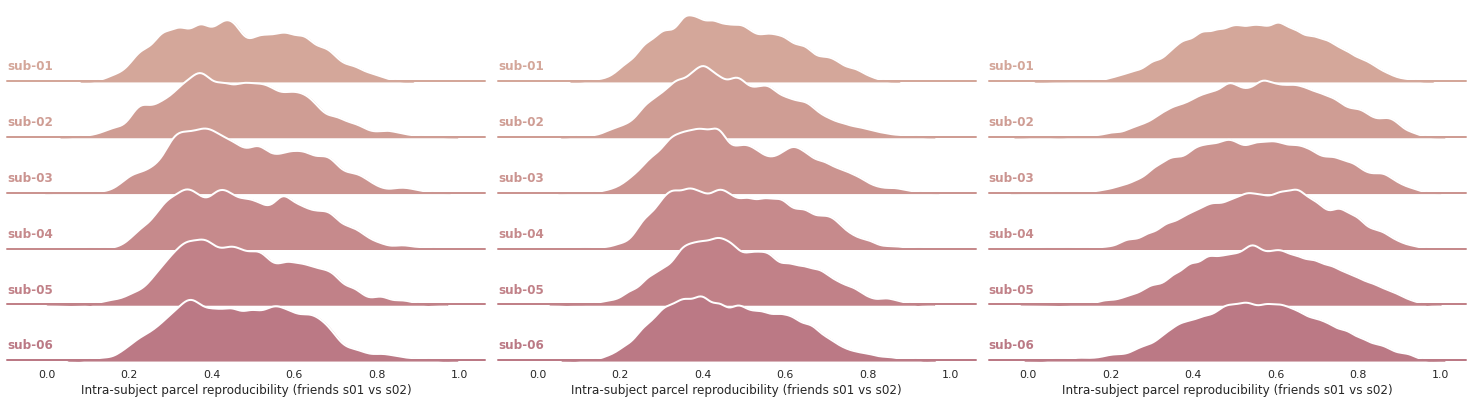

In [5]:
visu_repro(data, 
           title='Intra-subject parcel reproducibility (friends s01 vs s02)', type_comp='inter')